<a href="https://colab.research.google.com/github/nipun12-cyber/uom-AI-sessions/blob/main/sleep_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving sleep_lifestyle.csv to sleep_lifestyle.csv


In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv("sleep_lifestyle.csv")

# Quick look
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [6]:
# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# 3. Standardize column names (snake_case)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 4. Handle missing values
# Example: fill numerical NaNs with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 5. Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df.head(50)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Sleep Apnea
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Sleep Apnea
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Sleep Apnea


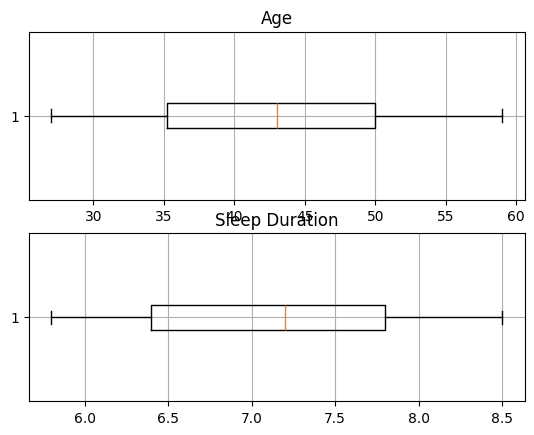

In [13]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.boxplot(df['age'], vert=False)
plt.title('Age')
plt.grid(True)
plt.subplot(2,1,2)
plt.boxplot(df['sleep_duration'], vert=False)
plt.title('Sleep Duration')
plt.grid(True)
plt.show()

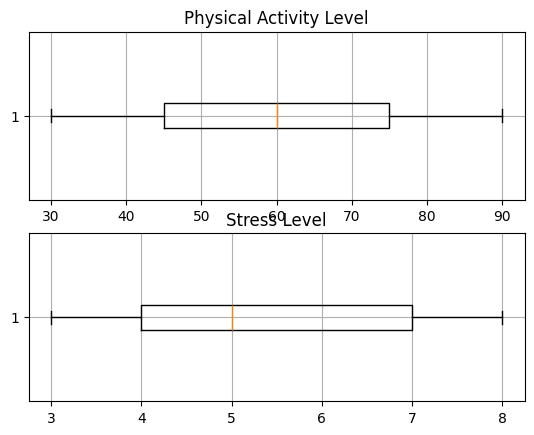

In [15]:
plt.subplot(2,1,1)
plt.boxplot(df['physical_activity_level'], vert=False)
plt.title('Physical Activity Level')
plt.grid(True)
plt.subplot(2,1,2)
plt.boxplot(df['stress_level'], vert=False)
plt.title('Stress Level')
plt.grid(True)
plt.show()

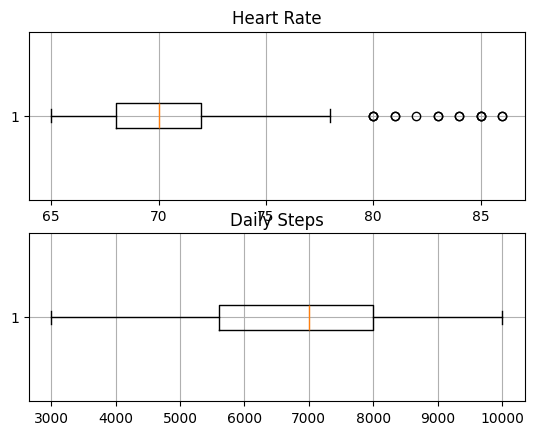

In [16]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.boxplot(df['heart_rate'], vert=False)
plt.title('Heart Rate')
plt.grid(True)
plt.subplot(2,1,2)
plt.boxplot(df['daily_steps'], vert=False)
plt.title('Daily Steps')
plt.grid(True)
plt.show()

In [18]:
# Scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_normalized.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,-1.727426,Male,-1.753096,Software Engineer,-1.298887,-1.098280,-0.825418,0.347021,Overweight,126/83,1.654719,-1.619584,Sleep Apnea
1,-1.718163,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,Sleep Apnea
2,-1.708901,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,Sleep Apnea
3,-1.699639,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea
4,-1.690376,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea
